In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
df = pd.read_csv("/content/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [5]:
lb = LabelEncoder()
df["output"] = lb.fit_transform(df["sentiment"])

In [6]:
del df["sentiment"]

In [7]:
df.head()
# 1-  pos
# 0-  neg

,review,output
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Text(0.5, 1.0, 'Sentiment Countplot')

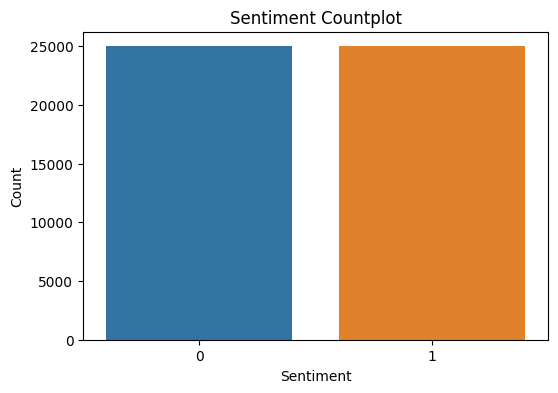

In [8]:
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
sns.countplot(data=df, x="output")

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Countplot")

In [9]:
df["output"].value_counts()

1    25000
0    25000
Name: output, dtype: int64

In [10]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  # Import the lemmatizer class
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Download WordNet for lemmatization

# Assuming df is your DataFrame
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()  # Instantiate the lemmatizer

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if not any(link in word for link in ['http', 'www'])])
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

df["text"] = df["review"].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df.head()

,review,output,text
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production . < br / > < br ...
2,I thought this was a wonderful way to spend ti...,1,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,0,basically there 's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei 's `` love in the time of money ...


In [13]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [14]:
def remove_br_tags(text):
    cleaned_text = re.sub(r'<br\s*\/?>', ' ', text)
    return cleaned_text

# Apply the function to the "text" column
df["text"] = df["review"].apply(remove_br_tags)

df.head()

,review,output,text
0,One of the other reviewers has mentioned that ...,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [15]:
del df["review"]

In [16]:
df.head()

,output,text
0,1,One of the other reviewers has mentioned that ...
1,1,A wonderful little production. The filming t...
2,1,I thought this was a wonderful way to spend ti...
3,0,Basically there's a family where a little boy ...
4,1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
tokenize = Tokenizer()

In [19]:
tokenize.fit_on_texts(df["text"])

In [76]:
tokenize.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'was': 12,
 'as': 13,
 'for': 14,
 'with': 15,
 'movie': 16,
 'but': 17,
 'film': 18,
 'on': 19,
 'not': 20,
 'you': 21,
 'are': 22,
 'his': 23,
 'have': 24,
 'be': 25,
 'one': 26,
 'he': 27,
 'all': 28,
 'at': 29,
 'by': 30,
 'an': 31,
 'they': 32,
 'so': 33,
 'who': 34,
 'from': 35,
 'like': 36,
 'or': 37,
 'just': 38,
 'her': 39,
 'out': 40,
 'about': 41,
 'if': 42,
 "it's": 43,
 'has': 44,
 'there': 45,
 'some': 46,
 'what': 47,
 'good': 48,
 'when': 49,
 'more': 50,
 'very': 51,
 'up': 52,
 'no': 53,
 'time': 54,
 'my': 55,
 'even': 56,
 'would': 57,
 'she': 58,
 'which': 59,
 'only': 60,
 'really': 61,
 'see': 62,
 'story': 63,
 'their': 64,
 'had': 65,
 'can': 66,
 'me': 67,
 'well': 68,
 'were': 69,
 'than': 70,
 'much': 71,
 'we': 72,
 'bad': 73,
 'been': 74,
 'get': 75,
 'do': 76,
 'great': 77,
 'other': 78,
 'will': 79,
 'also': 80,
 'into': 81,
 'people': 82,

In [77]:
seq = tokenize.texts_to_sequences(df["text"])

In [78]:
seq = pad_sequences(seq , maxlen = 100 , padding = "post")

In [81]:
np.shape(seq)

(50000, 100)

In [83]:
num = max(tokenize.word_index.values())
num

124252

In [17]:
from sklearn.model_selection import train_test_split

In [85]:
X_train , X_test , y_train , y_test = train_test_split(seq , df["output"] , test_size = 0.2)

# Simple RNN


In [94]:
from keras.layers import Dense , Embedding , SimpleRNN , LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
cb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [96]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = num , output_dim = 100 , input_length = 100))
model_rnn.add(SimpleRNN(100 , return_sequences = False))
model_rnn.add(Dense(1 , activation = "sigmoid"))

model_rnn.compile(loss = "binary_crossentropy", optimizer = "adam" , metrics = ["accuracy"])
history = model_rnn.fit(X_train , y_train , epochs = 10 , validation_split = 0.2 , callbacks=cb)

Epoch 1/10
1000/1000 [==============================] - 328s 326ms/step - loss: 0.6414 - accuracy: 0.6125 - val_loss: 0.6321 - val_accuracy: 0.6030
Epoch 2/10
1000/1000 [==============================] - 319s 319ms/step - loss: 0.5334 - accuracy: 0.7284 - val_loss: 0.6243 - val_accuracy: 0.6989
Epoch 3/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.4719 - accuracy: 0.7757 - val_loss: 0.5736 - val_accuracy: 0.6964
Epoch 4/10
1000/1000 [==============================] - 315s 315ms/step - loss: 0.4062 - accuracy: 0.8164 - val_loss: 0.6148 - val_accuracy: 0.7038
Epoch 5/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.4489 - accuracy: 0.7828 - val_loss: 0.6101 - val_accuracy: 0.7235
Epoch 6/10
1000/1000 [==============================] - 320s 320ms/step - loss: 0.3733 - accuracy: 0.8349 - val_loss: 0.5912 - val_accuracy: 0.7404


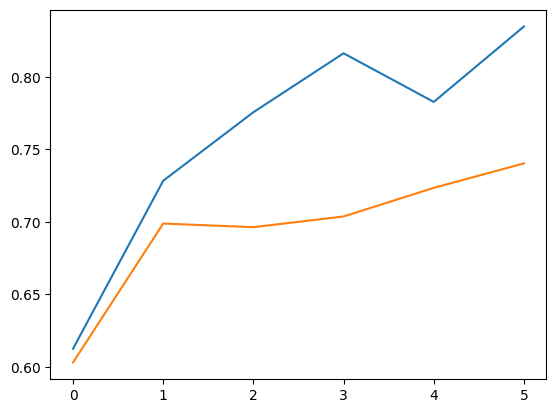

In [98]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [99]:
y_pred = model_rnn.predict(X_test)

313/313 [==============================] - 6s 17ms/step


In [100]:
y_pred = np.where(y_pred>0.5 ,1  ,0)

In [102]:
from sklearn.metrics import classification_report
class_names = ['Class 0', 'Class 1']

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Class 0       0.73      0.74      0.73      4983
     Class 1       0.74      0.73      0.73      5017

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



# LSTM


In [107]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = num , output_dim = 50 , input_length = 100))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1 , activation = "sigmoid"))

model_lstm.compile(loss = "binary_crossentropy", optimizer = "adam" , metrics = ["accuracy"])
history = model_lstm.fit(X_train , y_train , epochs = 10 , validation_split = 0.2 , callbacks=cb)

Epoch 1/10
1000/1000 [==============================] - 150s 143ms/step - loss: 0.3972 - accuracy: 0.8167 - val_loss: 0.3242 - val_accuracy: 0.8604
Epoch 2/10
1000/1000 [==============================] - 144s 144ms/step - loss: 0.2010 - accuracy: 0.9240 - val_loss: 0.3322 - val_accuracy: 0.8579
Epoch 3/10
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1107 - accuracy: 0.9624 - val_loss: 0.4482 - val_accuracy: 0.8518
Epoch 4/10
1000/1000 [==============================] - 157s 157ms/step - loss: 0.0623 - accuracy: 0.9797 - val_loss: 0.5637 - val_accuracy: 0.8485


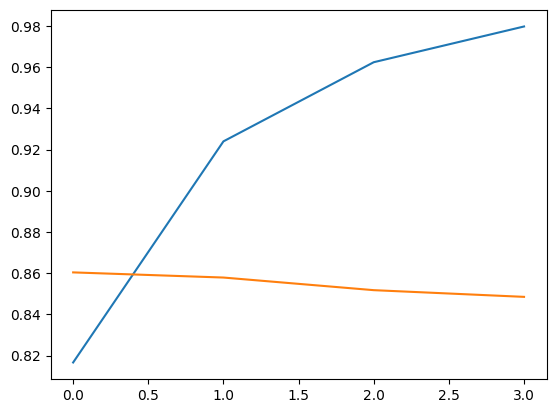

In [109]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [108]:
y_pred = model_lstm.predict(X_test)
y_pred = np.where(y_pred>0.5 ,1  ,0)

class_names = ['Class 0', 'Class 1']

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)

# Print the classification report
print(report)

313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

     Class 0       0.85      0.82      0.84      4983
     Class 1       0.83      0.86      0.84      5017

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# bag of words


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 128)
text_matrix = vectorizer.fit_transform(df["text"])
text_array = text_matrix.toarray()
text_array

array([[1, 0, 1, ..., 1, 3, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [2, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [19]:
X_train , X_test , y_train , y_test = train_test_split(text_array , df["output"] , test_size = 0.2)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      5013
           1       0.71      0.68      0.70      4987

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



#TF-IDF


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer(max_features = 128)
text_matrix = vectorizer.fit_transform(df["text"])
text_array = text_matrix.toarray()
text_array

array([[0.05106678, 0.        , 0.06744156, ..., 0.05783765, 0.13058844,
        0.07500592],
       [0.07530993, 0.        , 0.        , ..., 0.        , 0.06419441,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.07280866, 0.        , ..., 0.06095473, 0.        ,
        0.        ],
       [0.13949127, 0.        , 0.        , ..., 0.07899311, 0.05945139,
        0.        ],
       [0.07864356, 0.        , 0.        , ..., 0.0890708 , 0.06703601,
        0.        ]])

In [23]:
X_train , X_test , y_train , y_test = train_test_split(text_array , df["output"] , test_size = 0.2)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      4968
           1       0.73      0.73      0.73      5032

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

